In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
#from oauth2client.client import GoogleCredentials
import numpy as np

from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.model_selection import train_test_split

In [2]:
print(os.getcwd())

/Users/sbezawada/Documents/Workspace/MLE-COURSE/Capstone2


In [3]:
DRIVE_FOLDER = '/Users/sbezawada/Documents/Workspace/MLE-COURSE/Capstone/Data/false/'
entries = [entry for entry in os.listdir(DRIVE_FOLDER) if os.path.isfile(os.path.join(DRIVE_FOLDER, entry))]
false_dict = {'name':[]}
for file in entries:

    false_dict['name'].append(file)
DRIVE_FOLDER = '/Users/sbezawada/Documents/Workspace/MLE-COURSE/Capstone/Data/true/'
entries = [entry for entry in os.listdir(DRIVE_FOLDER) if os.path.isfile(os.path.join(DRIVE_FOLDER, entry))]
true_dict = {'name':[]}
for file in entries:

    true_dict['name'].append(file)


In [4]:
df1 = pd.DataFrame(false_dict)
df1['label'] = 0
df1['path'] = '/Users/sbezawada/Documents/Workspace/MLE-COURSE/Capstone/Data/false/'

df2 = pd.DataFrame(true_dict)
df2['label'] = 1
df2['path'] = '/Users/sbezawada/Documents/Workspace/MLE-COURSE/Capstone/Data/true/'

# combine both dataframes
df = pd.concat([df1,df2])
#shuffle the labels
df = df.sample(frac=1, random_state=56).reset_index(drop=True)

print('The length of the dataset is: ', f'{df.shape[0]:,}')

labels = df['label'].unique()
df.head

The length of the dataset is:  1,435


<bound method NDFrame.head of                       name  label  \
0        Mani_false563.wav      0   
1         Maninoise615.wav      1   
2        Mani_false399.wav      0   
3     Mani_false212(1).wav      0   
4          Maninoise11.wav      1   
...                    ...    ...   
1430        Mani624(1).wav      1   
1431            Mani50.wav      1   
1432       Maninoise12.wav      1   
1433     Mani_false191.wav      0   
1434     Mani_false388.wav      0   

                                                   path  
0     /Users/sbezawada/Documents/Workspace/MLE-COURS...  
1     /Users/sbezawada/Documents/Workspace/MLE-COURS...  
2     /Users/sbezawada/Documents/Workspace/MLE-COURS...  
3     /Users/sbezawada/Documents/Workspace/MLE-COURS...  
4     /Users/sbezawada/Documents/Workspace/MLE-COURS...  
...                                                 ...  
1430  /Users/sbezawada/Documents/Workspace/MLE-COURS...  
1431  /Users/sbezawada/Documents/Workspace/MLE-COURS...  
143

The following is the distribution of labels in our data

In [8]:
df.label.value_counts()

0    738
1    697
Name: label, dtype: int64

In [30]:
i=0

wave_audio, wave_sample_rate, =librosa.load(df['path'][i] + df['name'][i])
#print(wave_audio, wave_sample_rate)

Text(0.5, 1.0, '0')

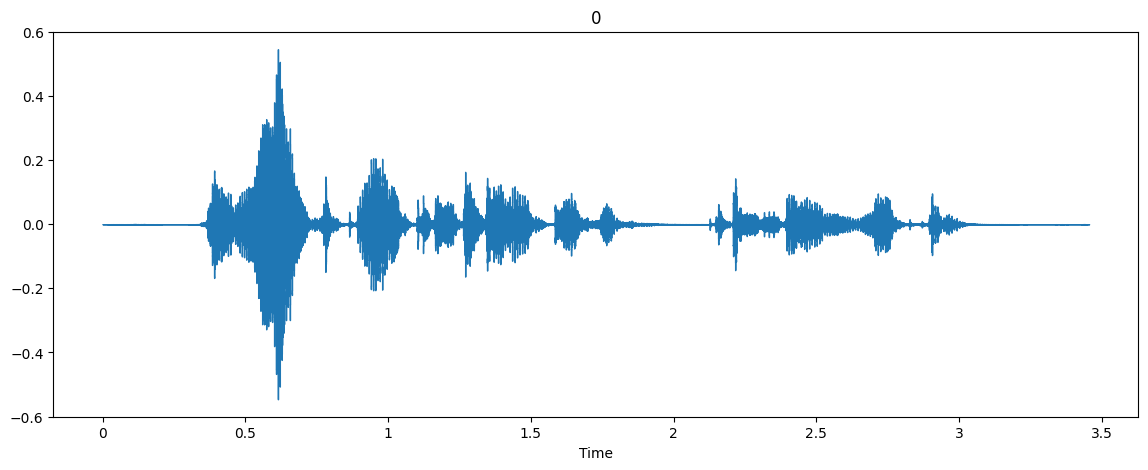

In [33]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(wave_audio, sr=wave_sample_rate)
plt.title(df['label'][i])


In [36]:
i=1
wave_audio, wave_sample_rate, =librosa.load(df['path'][i] + df['name'][i])
print(wave_audio, wave_sample_rate)

[ 0.10544381  0.10643484  0.13601826 ... -0.03695938 -0.00616102
  0.        ] 22050


Text(0.5, 1.0, '1')

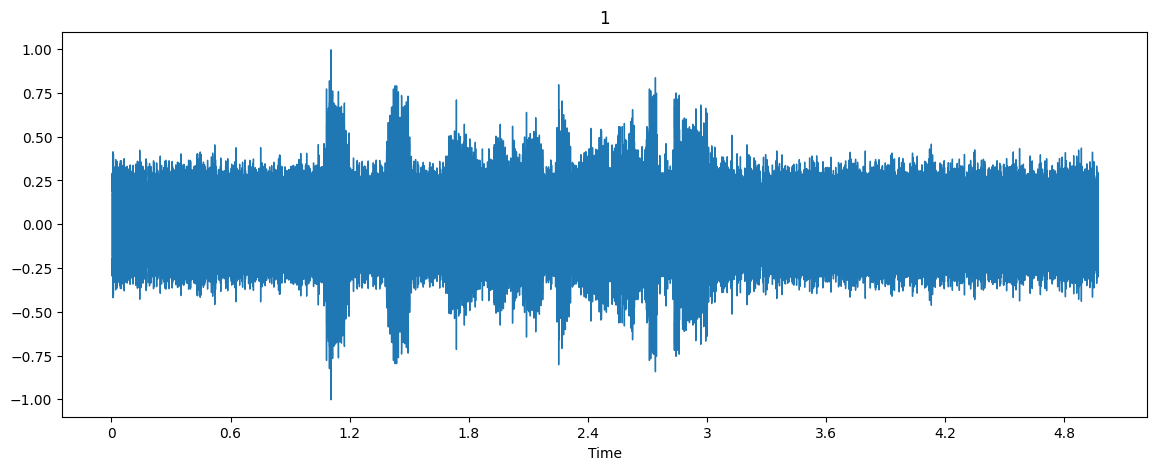

In [37]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(wave_audio, sr=wave_sample_rate)
plt.title(df['label'][i])

MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound

(20, 214)


/var/folders/mt/52sww7c50ws851nqq95j74qc0000gp/T/ipykernel_18358/2388301421.py:3: FutureWarning: Pass y=[ 0.10544381  0.10643484  0.13601826 ... -0.03695938 -0.00616102
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(wave_audio, sr=wave_sample_rate)


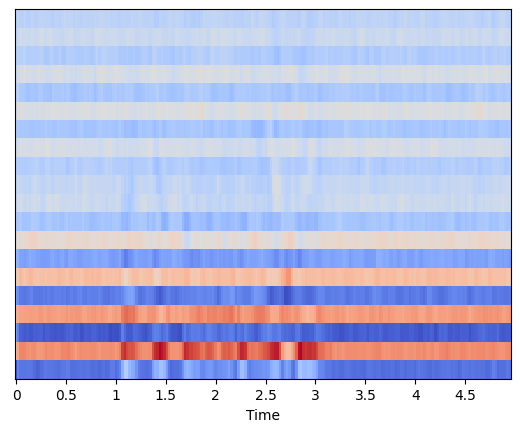

In [38]:
i=1
wave_audio, wave_sample_rate, =librosa.load(df['path'][i] + df['name'][i])
mfccs = librosa.feature.mfcc(wave_audio, sr=wave_sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=wave_sample_rate, x_axis='time')

In [39]:
mfccs

array([[-76.018776  , -55.01994   , -61.033237  , ..., -64.55922   ,
        -60.574196  , -62.327103  ],
       [ 55.69571   ,  67.74386   ,  83.50043   , ...,  78.47429   ,
         81.78206   ,  81.619446  ],
       [-37.87152   , -56.722157  , -71.832375  , ..., -75.38687   ,
        -74.185165  , -72.54881   ],
       ...,
       [ -1.7415534 ,  -3.8856807 ,  -5.115803  , ...,  -4.482865  ,
         -7.0911713 ,  -7.9021215 ],
       [  4.2973814 ,   6.817177  ,  11.369244  , ...,   8.950613  ,
          7.203162  ,  10.972771  ],
       [  0.3651726 ,   0.58322644,  -2.8535287 , ...,   2.8438132 ,
         -2.8969138 ,  -2.5009265 ]], dtype=float32)

In [5]:
#extract for the complete dataset
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    #set a window width to 25 ms and the stride to 10 ms
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40,hop_length=int(0.010*sample_rate), n_fft=int(0.025*sample_rate))
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [6]:
extracted_features=[]
for i in range(len(df)):
    print(i)
    file_name = df['path'][1] + df['name'][1] #os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=df['label'][1]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [7]:
extracted_features[:10]


[[array([-198.08871   ,   95.9464    ,  -73.620575  ,   82.909676  ,
          -57.40836   ,   55.00947   ,  -34.135807  ,   26.262653  ,
           -8.749689  ,    3.3874161 ,   10.556077  ,   -9.504437  ,
           19.141546  ,  -12.604753  ,   20.148798  ,   -7.9722257 ,
           12.9002905 ,   -1.8799459 ,    4.745149  ,    5.046205  ,
           -1.4023784 ,    8.916624  ,   -4.3325458 ,    9.704553  ,
           -2.9948456 ,    8.072853  ,   -0.8234372 ,    4.9581804 ,
            2.7987278 ,    2.0739443 ,    4.850915  ,    0.33935192,
            6.427066  ,   -1.1159623 ,    5.2615    ,   -0.58935297,
            3.7792387 ,    0.3350266 ,    2.0879018 ,    1.8717946 ],
        dtype=float32),
  1],
 [array([-198.08871   ,   95.9464    ,  -73.620575  ,   82.909676  ,
          -57.40836   ,   55.00947   ,  -34.135807  ,   26.262653  ,
           -8.749689  ,    3.3874161 ,   10.556077  ,   -9.504437  ,
           19.141546  ,  -12.604753  ,   20.148798  ,   -7.9722257 ,
   

In [8]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-198.08871, 95.9464, -73.620575, 82.909676, -...",1
1,"[-198.08871, 95.9464, -73.620575, 82.909676, -...",1
2,"[-198.08871, 95.9464, -73.620575, 82.909676, -...",1
3,"[-198.08871, 95.9464, -73.620575, 82.909676, -...",1
4,"[-198.08871, 95.9464, -73.620575, 82.909676, -...",1


In [9]:
len(extracted_features_df['feature'][0])

40

In [10]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())
X.shape

(1435, 40)

In [11]:
### Train Test Split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape

(1148, 40)

In [12]:
y_train.shape

(1148,)

In [13]:
X_test.shape


(287, 40)

In [14]:
y_test.shape

(287,)

In [15]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
tf.random.set_seed(7)

2022-09-22 12:01:53.067349: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0


In [20]:
import keras
#simple NN in keras
model=Sequential()
model.add(Dense(2, input_dim =40,activation='relu'))
#40 input parameters with 2 neurons or dimensionality of the output space.
model.add(Dense(1, activation=tf.nn.sigmoid))
model.compile(loss='binary_crossentropy',metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()],optimizer='adam')

In [23]:
model.fit(X_train, y_train, epochs=5, batch_size=200)

test_loss, test_accuracy,test_precision, test_recall  = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test precision:', test_precision)
print('Test Recall:', test_recall)

Epoch 1/5
1148/1148 [==============================] - 3s 3ms/step - loss: 2.9704e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

In [73]:
print("SHAP version is:", shap.__version__)
print("Tensorflow version is:", tf.__version__)

SHAP version is: 0.41.0
Tensorflow version is: 2.10.0


In [34]:
#explain outputs
import shap
X_train_sample = shap.sample(X_train, 200)
X_test_sample = shap.sample(X_test, 40)

# creating the KernelExplainer using the logistic regression model and training sample
SHAP_explainer = shap.KernelExplainer(model.predict, X_train_sample)
# calculating the shap values of the test sample using the explainer
shap_vals = SHAP_explainer.shap_values(X_test_sample)

# converting the test samples to a dataframe
# this is necessary for non-tabular data in order for the visualisations
# to include feature value
colour_test = pd.DataFrame(X_test_sample)

7/7 [==============================] - 0s 1ms/step


Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/40 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


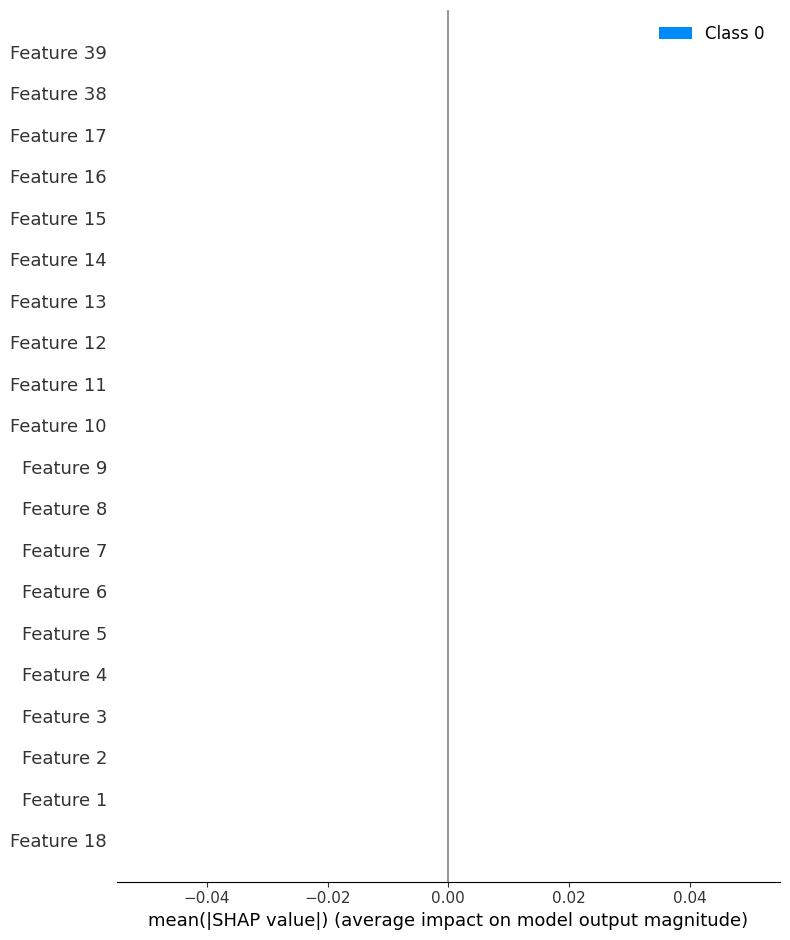

In [59]:
shap.summary_plot(shap_vals, X_test_sample,cmap=plt.get_cmap("tab10"),show=False)
plt.gcf().axes[-1].set_aspect('auto')
#shap.plots.beeswarm(shap_values2, show=False, color_bar=False)
#plt.colorbar()
plt.show()

In [62]:
shap.force_plot(SHAP_explainer.expected_value, shap_vals[1,:],
                colour_test.iloc[1,:])

TypeError: unhashable type: 'numpy.ndarray'

In [40]:
explainer2 = shap.Explainer(model.predict, X_train_sample)
shap_values2 = explainer2(X_train_sample)
shap_values2.values

4/4 [==============================] - 0s 1ms/step


Permutation explainer:  76%|███████▌  | 151/200 [00:00<?, ?it/s]

4/4 [==============================] - 0s 2ms/step


Permutation explainer:  78%|███████▊  | 155/200 [00:10<00:01, 28.29it/s]

4/4 [==============================] - 0s 1ms/step


Permutation explainer:  79%|███████▉  | 158/200 [00:10<00:01, 22.53it/s]

4/4 [==============================] - 0s 2ms/step


Permutation explainer:  80%|████████  | 161/200 [00:10<00:01, 20.84it/s]

4/4 [==============================] - 0s 1ms/step


Permutation explainer:  82%|████████▏ | 164/200 [00:10<00:01, 20.95it/s]

4/4 [==============================] - 0s 1ms/step


Permutation explainer:  84%|████████▎ | 167/200 [00:10<00:01, 17.18it/s]

4/4 [==============================] - 0s 1ms/step


Permutation explainer:  85%|████████▌ | 170/200 [00:10<00:01, 18.06it/s]

4/4 [==============================] - 0s 1ms/step


Permutation explainer:  86%|████████▋ | 173/200 [00:11<00:01, 18.93it/s]

4/4 [==============================] - 0s 1ms/step


Permutation explainer:  88%|████████▊ | 176/200 [00:11<00:01, 19.63it/s]

4/4 [==============================] - 0s 1ms/step


Permutation explainer:  90%|████████▉ | 179/200 [00:11<00:01, 19.81it/s]

4/4 [==============================] - 0s 1ms/step


Permutation explainer:  91%|█████████ | 182/200 [00:11<00:00, 19.83it/s]

4/4 [==============================] - 0s 1ms/step


Permutation explainer:  92%|█████████▎| 185/200 [00:11<00:00, 20.26it/s]

4/4 [==============================] - 0s 1ms/step


Permutation explainer:  94%|█████████▍| 188/200 [00:11<00:00, 20.25it/s]

4/4 [==============================] - 0s 1ms/step


Permutation explainer:  96%|█████████▌| 191/200 [00:12<00:00, 20.39it/s]

4/4 [==============================] - 0s 1ms/step


Permutation explainer:  97%|█████████▋| 194/200 [00:12<00:00, 20.59it/s]

4/4 [==============================] - 0s 2ms/step


Permutation explainer:  98%|█████████▊| 197/200 [00:12<00:00, 20.29it/s]

4/4 [==============================] - 0s 1ms/step


Permutation explainer: 100%|██████████| 200/200 [00:12<00:00, 20.56it/s]

4/4 [==============================] - 0s 1ms/step


Permutation explainer: 201it [00:12,  4.00it/s]                         


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

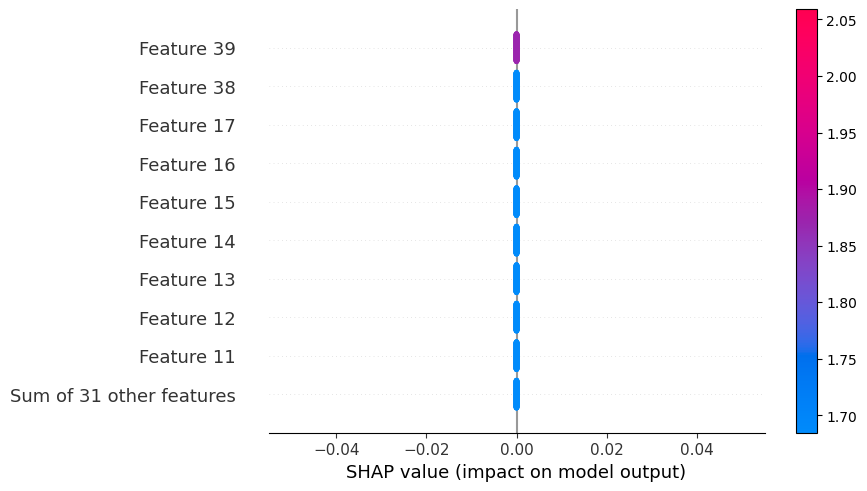

In [68]:
shap.plots.beeswarm(shap_values2, show=False, color_bar=False)
#plt.gcf().axes[-1].set_box_aspect(2000)
plt.colorbar()
plt.show()

In [70]:
shap.force_plot(explainer2.expected_value, shap_values2[0][0],X_train_sample.iloc[0,:])

AttributeError: 'Permutation' object has no attribute 'expected_value'

In [72]:
shap.initjs()
shap.force_plot(
    explainer2.expected_value[0], shap_values2[0][0]
)

AttributeError: 'Permutation' object has no attribute 'expected_value'